In [1]:
data={
    'Name':['Alice','BoB','Charlie'],
    'Age':[25,30,35]
}

In [2]:
import pandas as pd
df=pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,BoB,30
2,Charlie,35


In [3]:
df=pd.read_csv("Car_sales.csv")
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [4]:
df.tail()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15
156,Volvo,S80,18.969,.,Passenger,36,2.9,201,109.9,72.1,189.8,3.6,21.1,24,14-Nov-15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [6]:
df=df.drop_duplicates()
df["Horsepower"]=pd.to_numeric(df["Horsepower"],errors="coerce")

In [7]:
def find_min_max(df,col):
    min_val=df[col].min()
    max_val=df[col].max()
    min_row=df[df[col]==min_val]
    max_row=df[df[col]==max_val]
    return min_val,max_val,min_row,max_row
min_val,max_val,min_row,max_row=find_min_max(df,'Horsepower')

In [8]:
print(min_val)
print(max_val)

55.0
450.0


In [9]:
min_row

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
26,Chevrolet,Metro,21.855,5.16,Passenger,9.235,1,55.0,93.1,62.6,149.4,1.895,10.3,45,13-Apr-14


In [10]:
max_row

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
39,Dodge,Viper,0.916,58.47,Passenger,69.725,8,450.0,96.2,75.7,176.7,3.375,19,16,8-Jul-15


In [11]:
from scipy.stats import gaussian_kde
df["Length"]=pd.to_numeric(df["Length"],errors="coerce")
df["Length"]=df["Length"].fillna(df["Length"].median())

In [12]:
df["Length"].isnull().sum()

0

In [13]:
kde=gaussian_kde(df["Length"])
density=kde.evaluate(df["Length"])
res=pd.DataFrame({'Length':df["Length"],'Density':density})
res

,Length,Density
0,172.4,0.016110
1,192.9,0.027726
2,192.0,0.028335
3,196.6,0.023690
4,178.0,0.023710
...,...,...
152,176.6,0.022512
153,185.9,0.027616
154,186.2,0.027786
155,185.7,0.027501


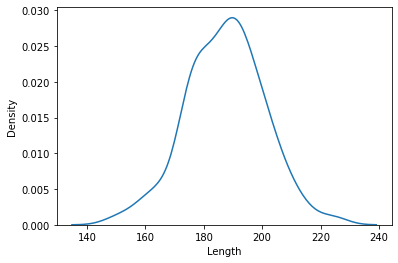

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df["Length"])
plt.show()

In [15]:
df.groupby('Manufacturer')['Fuel efficiency'].value_counts().reset_index(name='Count')

,Manufacturer,Fuel efficiency,Count
0,Acura,22,1
1,Acura,28,1
2,Acura,26,1
3,Acura,25,1
4,Audi,27,1
...,...,...,...
112,Volkswagen,26,5
113,Volkswagen,27,1
114,Volvo,25,4
115,Volvo,24,1


In [16]:
df.groupby('Manufacturer').size().reset_index(name='Count')

,Manufacturer,Count
0,Acura,4
1,Audi,3
2,BMW,3
3,Buick,4
4,Cadillac,5
5,Chevrolet,9
6,Chrysler,7
7,Dodge,11
8,Ford,11
9,Honda,5


In [17]:
df.iloc[:,[i for i in range(df.shape[1]) if i not in [1,3,6]]]

,Manufacturer,Sales in thousands,Vehicle type,Price in thousands,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,16.919,Passenger,21.5,140.0,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,39.384,Passenger,28.4,225.0,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,14.114,Passenger,.,225.0,106.9,70.6,192.0,3.47,17.2,26,1-Apr-14
3,Acura,8.588,Passenger,42,210.0,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,20.397,Passenger,23.99,150.0,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,Passenger,24.4,160.0,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,15.245,Passenger,27.5,168.0,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,17.531,Passenger,28.8,168.0,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,3.493,Passenger,45.5,236.0,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [18]:
cols=df.select_dtypes(include=['number'])

In [19]:
cols

,Sales in thousands,Horsepower,Length
0,16.919,140.0,172.4
1,39.384,225.0,192.9
2,14.114,225.0,192.0
3,8.588,210.0,196.6
4,20.397,150.0,178.0
...,...,...,...
152,3.545,160.0,176.6
153,15.245,168.0,185.9
154,17.531,168.0,186.2
155,3.493,236.0,185.7


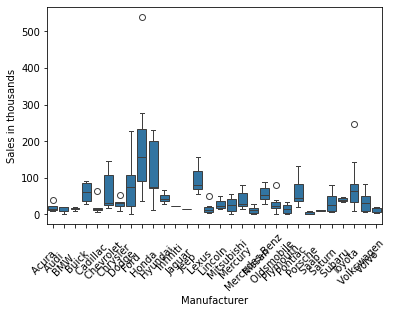

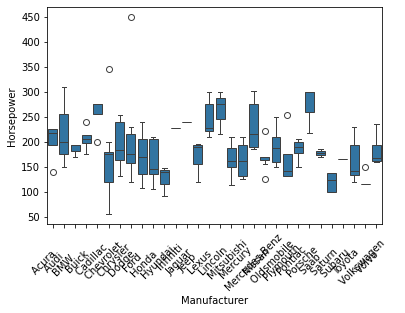

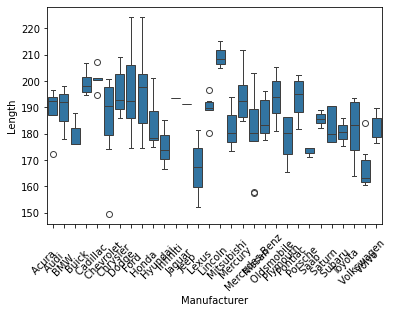

In [20]:
for col in cols:
    sns.boxplot(x='Manufacturer',y=col,data=df)
    plt.xticks(rotation=45)
    plt.show()

In [21]:
sales_col=[col for col in df.columns if 'sales' in col.lower()]
if not sales_col:
    raise KeyError("No column")
sales_col_name=sales_col[0]
sales_col_name

'Sales in thousands'

In [22]:
cols=df.select_dtypes(include=['category','object'])
cols

,Manufacturer,Model,4-year resale value,Vehicle type,Price in thousands,Engine size,Wheelbase,Width,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.36,Passenger,21.5,1.8,101.2,67.3,2.639,13.2,28,2-Feb-14
1,Acura,TL,19.875,Passenger,28.4,3.2,108.1,70.3,3.517,17.2,25,6-Mar-15
2,Acura,CL,18.225,Passenger,.,3.2,106.9,70.6,3.47,17.2,26,1-Apr-14
3,Acura,RL,29.725,Passenger,42,3.5,114.6,71.4,3.85,18,22,3-Oct-15
4,Audi,A4,22.255,Passenger,23.99,1.8,102.6,68.2,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,.,Passenger,24.4,1.9,100.5,67.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,.,Passenger,27.5,2.4,104.9,69.3,3.208,17.9,25,24-Nov-14
154,Volvo,V70,.,Passenger,28.8,2.4,104.9,69.3,3.259,17.9,25,25-Jun-15
155,Volvo,C70,.,Passenger,45.5,2.3,104.9,71.5,3.601,18.5,23,26-Apr-15


In [23]:
cols=["Manufacturer","Model"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,0,79,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,0,143,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,0,25,14.114,18.225,Passenger,.,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26,1-Apr-14
3,0,115,8.588,29.725,Passenger,42,3.5,210.0,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,1,8,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,.,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,29,125,15.245,.,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,29,149,17.531,.,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,29,24,3.493,.,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [24]:
df=df.drop(columns=["Latest Launch"])

In [25]:
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency
0,0,79,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28
1,0,143,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25
2,0,25,14.114,18.225,Passenger,.,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26
3,0,115,8.588,29.725,Passenger,42,3.5,210.0,114.6,71.4,196.6,3.85,18,22
4,1,8,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,.,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25
153,29,125,15.245,.,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25
154,29,149,17.531,.,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25
155,29,24,3.493,.,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23


In [26]:
cols=df.select_dtypes(include=['object','category'])

In [27]:
cols

,4-year resale value,Vehicle type,Price in thousands,Engine size,Wheelbase,Width,Curb weight,Fuel capacity,Fuel efficiency
0,16.36,Passenger,21.5,1.8,101.2,67.3,2.639,13.2,28
1,19.875,Passenger,28.4,3.2,108.1,70.3,3.517,17.2,25
2,18.225,Passenger,.,3.2,106.9,70.6,3.47,17.2,26
3,29.725,Passenger,42,3.5,114.6,71.4,3.85,18,22
4,22.255,Passenger,23.99,1.8,102.6,68.2,2.998,16.4,27
...,...,...,...,...,...,...,...,...,...
152,.,Passenger,24.4,1.9,100.5,67.6,3.042,15.8,25
153,.,Passenger,27.5,2.4,104.9,69.3,3.208,17.9,25
154,.,Passenger,28.8,2.4,104.9,69.3,3.259,17.9,25
155,.,Passenger,45.5,2.3,104.9,71.5,3.601,18.5,23


In [28]:
cols=cols.drop(columns=["Vehicle type"])

In [29]:
for col in cols:
    df[col]=pd.to_numeric(df[col],errors="coerce")

In [30]:
cols=df.select_dtypes(include=['number'])

In [31]:
for col in cols:
    df[col]=df[col].fillna(df[col].median())

In [32]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
dtype: int64

In [33]:
df=pd.get_dummies(df,columns=["Vehicle type"]).astype(int)

In [34]:
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Vehicle type_Car,Vehicle type_Passenger
0,0,79,16,16,21,1,140,101,67,172,2,13,28,0,1
1,0,143,39,19,28,3,225,108,70,192,3,17,25,0,1
2,0,25,14,18,22,3,225,106,70,192,3,17,26,0,1
3,0,115,8,29,42,3,210,114,71,196,3,18,22,0,1
4,1,8,20,22,23,1,150,102,68,178,2,16,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3,14,24,1,160,100,67,176,3,15,25,0,1
153,29,125,15,14,27,2,168,104,69,185,3,17,25,0,1
154,29,149,17,14,28,2,168,104,69,186,3,17,25,0,1
155,29,24,3,14,45,2,236,104,71,185,3,18,23,0,1


In [35]:
X=df.drop(columns=["Sales in thousands"])
y=df["Sales in thousands"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

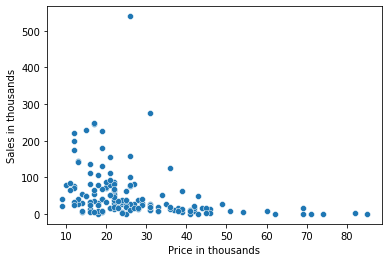

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df['Price in thousands'],y=df["Sales in thousands"])
plt.show()

In [38]:
df['Price in thousands'].corr(df['Sales in thousands'])

-0.30604869806822166

In [39]:
sort_df=df.sort_values(by=["Price in thousands"],ascending=True)

In [40]:
sort_df.iloc[0]

Manufacturer                5
Model                      94
Sales in thousands         21
4-year resale value         5
Price in thousands          9
Engine size                 1
Horsepower                 55
Wheelbase                  93
Width                      62
Length                    149
Curb weight                 1
Fuel capacity              10
Fuel efficiency            45
Vehicle type_Car            0
Vehicle type_Passenger      1
Name: 26, dtype: int64

In [41]:
sort_df.iloc[-1]

Manufacturer               16
Model                      26
Sales in thousands          0
4-year resale value        14
Price in thousands         85
Engine size                 5
Horsepower                302
Wheelbase                 113
Width                      73
Length                    196
Curb weight                 4
Fuel capacity              23
Fuel efficiency            20
Vehicle type_Car            0
Vehicle type_Passenger      1
Name: 99, dtype: int64

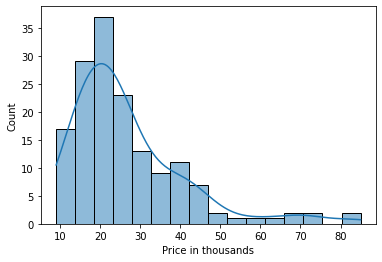

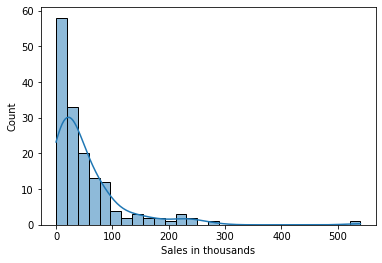

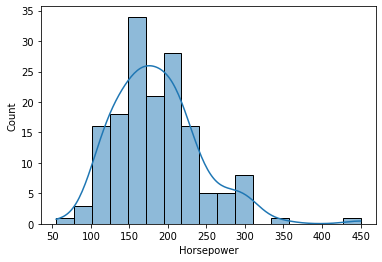

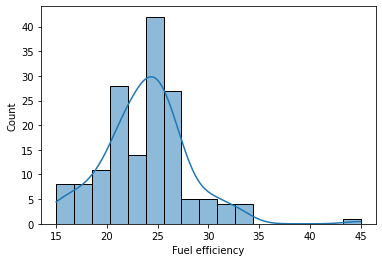

In [42]:
cols=["Price in thousands","Sales in thousands","Horsepower","Fuel efficiency"]
for col in cols:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [43]:
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Vehicle type_Car,Vehicle type_Passenger
0,0,79,16,16,21,1,140,101,67,172,2,13,28,0,1
1,0,143,39,19,28,3,225,108,70,192,3,17,25,0,1
2,0,25,14,18,22,3,225,106,70,192,3,17,26,0,1
3,0,115,8,29,42,3,210,114,71,196,3,18,22,0,1
4,1,8,20,22,23,1,150,102,68,178,2,16,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3,14,24,1,160,100,67,176,3,15,25,0,1
153,29,125,15,14,27,2,168,104,69,185,3,17,25,0,1
154,29,149,17,14,28,2,168,104,69,186,3,17,25,0,1
155,29,24,3,14,45,2,236,104,71,185,3,18,23,0,1


In [44]:
df1=pd.read_csv("Car_sales.csv")
df1

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [45]:
max=df1.isnull().sum().idxmax()
df1.drop(max,axis=1)

,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [46]:
cat_cols=df1.select_dtypes(include=['category'])
m=df1.dropna(subset=cols)

m

In [47]:
m

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [48]:
num_cols=df1.select_dtypes(include=['number']).columns
rows=df1[df1[num_cols].isnull().any(axis=1)]
rows

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch


In [49]:
cols=["Manufacturer","Model","Vehicle type"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df1[col]=le.fit_transform(df1[col])
df1

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,0,79,16.919,16.36,1,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,0,143,39.384,19.875,1,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,0,25,14.114,18.225,1,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,0,115,8.588,29.725,1,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,1,8,20.397,22.255,1,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,.,1,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,29,125,15.245,.,1,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,29,149,17.531,.,1,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,29,24,3.493,.,1,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [50]:
cats=df1.select_dtypes(include=['category','object'])
cats=cats.drop(columns=["Latest Launch"])
cats

,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency
0,16.36,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28
1,19.875,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25
2,18.225,.,3.2,225,106.9,70.6,192,3.47,17.2,26
3,29.725,42,3.5,210,114.6,71.4,196.6,3.85,18,22
4,22.255,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27
...,...,...,...,...,...,...,...,...,...,...
152,.,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25
153,.,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25
154,.,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25
155,.,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23


In [51]:
for col in cats:
    df1[col]=pd.to_numeric(df1[col],errors="coerce")
df1

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,0,79,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-Feb-14
1,0,143,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6-Mar-15
2,0,25,14.114,18.225,1,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
3,0,115,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3-Oct-15
4,1,8,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,NaN,1,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,21-Sep-15
153,29,125,15.245,NaN,1,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,24-Nov-14
154,29,149,17.531,NaN,1,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,25-Jun-15
155,29,24,3.493,NaN,1,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,26-Apr-15


In [52]:
r=df1.select_dtypes(include=['number']).columns
m=df1[df1[r].isnull().any(axis=1)]
m

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
2,0,25,14.114,18.225,1,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1-Apr-14
7,2,3,19.747,NaN,1,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,28-Jun-15
15,4,137,15.943,27.100,1,44.475,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,29-Apr-15
18,4,59,14.785,NaN,0,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,17-Apr-14
27,5,78,107.995,NaN,1,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,18-Jun-15
33,6,146,53.480,19.540,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-Jul-15
34,6,2,30.696,NaN,1,29.185,3.5,253.0,113.0,74.4,197.8,3.567,17.0,23.0,2-Oct-14
38,7,80,88.028,12.275,1,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6-Feb-14
44,7,53,101.323,NaN,0,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,27-Jun-14
50,8,65,175.670,NaN,1,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0,22-Jul-14


In [53]:
for col in cats:
    df[col]=df[col].fillna(df[col].median())
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Vehicle type_Car,Vehicle type_Passenger
0,0,79,16,16,21,1,140,101,67,172,2,13,28,0,1
1,0,143,39,19,28,3,225,108,70,192,3,17,25,0,1
2,0,25,14,18,22,3,225,106,70,192,3,17,26,0,1
3,0,115,8,29,42,3,210,114,71,196,3,18,22,0,1
4,1,8,20,22,23,1,150,102,68,178,2,16,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3,14,24,1,160,100,67,176,3,15,25,0,1
153,29,125,15,14,27,2,168,104,69,185,3,17,25,0,1
154,29,149,17,14,28,2,168,104,69,186,3,17,25,0,1
155,29,24,3,14,45,2,236,104,71,185,3,18,23,0,1


In [54]:
df.isnull().sum()

Manufacturer              0
Model                     0
Sales in thousands        0
4-year resale value       0
Price in thousands        0
Engine size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb weight               0
Fuel capacity             0
Fuel efficiency           0
Vehicle type_Car          0
Vehicle type_Passenger    0
dtype: int64

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred=model.predict(X_test)

In [57]:
y_pred

array([-121.86760599,   71.5282456 ,   73.61609653,   50.75255513,
         58.77342971,   38.9735625 ,  -49.86259123,  -20.21782586,
          8.20498258,   31.68301967,  102.3607384 ,  141.14869873,
         30.35117453,   73.01406864,    9.91407063,   48.83237161,
       -122.06966909,   98.61963729,  -47.61809539,   42.69095489,
         78.05880605,   69.7017726 ,   64.3286233 ,   30.27792101,
         94.53188321,   58.60417855,  111.60716328,   15.68467499,
         62.21880603,   31.67349789,   65.37087374,    4.51793801,
         40.84541706,  107.8312302 ,  -52.41317326,   21.80514794,
         42.8518192 ,  105.67302721,   19.4656912 ,   19.98995075,
        125.36892555,   11.92848893,   39.92430526,   52.6372387 ,
         52.51066482,   31.28985284,   97.11555301,   62.78974142])

In [58]:
model.score(X_train,y_train)

0.3510923525429863

In [59]:
model.score(X_test,y_test)

0.16443294289476507

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.16443294289476507
6347.376082817093


In [62]:
cols=["Price in thousands","Sales in thousands","Horsepower","Fuel efficiency"]

In [63]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [65]:
df_st=df.copy()

In [66]:
scaler=StandardScaler()

In [67]:
df_st[cols]=scaler.fit_transform(df[cols])

In [68]:
normalizer=MinMaxScaler()

In [69]:
df_st[cols]=normalizer.fit_transform(df[cols])

In [70]:
df[cols].corr()

,Price in thousands,Sales in thousands,Horsepower,Fuel efficiency
Price in thousands,1.000000,-0.306049,0.837094,-0.492518
Sales in thousands,-0.306049,1.000000,-0.198485,-0.016820
Horsepower,0.837094,-0.198485,1.000000,-0.610440
Fuel efficiency,-0.492518,-0.016820,-0.610440,1.000000
